In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import  MinMaxScaler
from sklearn.model_selection import train_test_split
from keras import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor


from keras import backend
 


Using TensorFlow backend.


In [16]:
from math import sqrt
from sklearn.metrics import mean_squared_error
from keras.optimizers import SGD

In [3]:
train_installs = pd.read_csv("../../features/entrenar_installs_final.csv", index_col=0)

In [4]:
train_installs.fillna(0,inplace = True)

In [7]:
X, y = train_installs.drop("target",axis = 1), train_installs["target"]



In [8]:
y= y.values.reshape(-1,1)
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
print(scaler_x.fit(X))
xscale=scaler_x.transform(X)
print(scaler_y.fit(y))
yscale=scaler_y.transform(y)

MinMaxScaler(copy=True, feature_range=(0, 1))
MinMaxScaler(copy=True, feature_range=(0, 1))


In [9]:
X_train, X_test, y_train, y_test = train_test_split(xscale, yscale, test_size=0.33, random_state=0)

In [10]:
def rmse(y_true, y_pred):
    return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))

def build_regressor():
    regressor = Sequential()
    regressor.add(Dense(units=13, input_dim=104))
    regressor.add(Dense(units=1))
    regressor.compile(loss='mse', optimizer='adam', metrics=[rmse])
    return regressor

In [65]:
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 32)                2176      
_________________________________________________________________
dense_20 (Dense)             (None, 4)                 132       
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 5         
Total params: 2,313
Trainable params: 2,313
Non-trainable params: 0
_________________________________________________________________


In [66]:
model.compile(loss='mse', optimizer="adam", metrics=['mse',rmse])

In [67]:
history = model.fit(X_train, y_train, epochs=20, verbose=1, batch_size= 16, validation_data=(X_test,y_test))

Train on 360670 samples, validate on 177644 samples
Epoch 1/20
360670/360670 [==============================] - 27s 76us/step - loss: 0.0877 - mean_squared_error: 0.0877 - rmse: 0.2578 - val_loss: 0.0882 - val_mean_squared_error: 0.0882 - val_rmse: 0.2561
Epoch 2/20
360670/360670 [==============================] - 29s 80us/step - loss: 0.0873 - mean_squared_error: 0.0873 - rmse: 0.2575 - val_loss: 0.0870 - val_mean_squared_error: 0.0870 - val_rmse: 0.2574
Epoch 3/20
360670/360670 [==============================] - 29s 80us/step - loss: 0.0873 - mean_squared_error: 0.0873 - rmse: 0.2575 - val_loss: 0.0870 - val_mean_squared_error: 0.0870 - val_rmse: 0.2568
Epoch 4/20
360670/360670 [==============================] - 27s 75us/step - loss: 0.0873 - mean_squared_error: 0.0873 - rmse: 0.2575 - val_loss: 0.0869 - val_mean_squared_error: 0.0869 - val_rmse: 0.2570
Epoch 5/20
360670/360670 [==============================] - 26s 72us/step - loss: 0.0873 - mean_squared_error: 0.0873 - rmse: 0.2575

dict_keys(['val_loss', 'val_mean_squared_error', 'val_rmse', 'loss', 'mean_squared_error', 'rmse'])


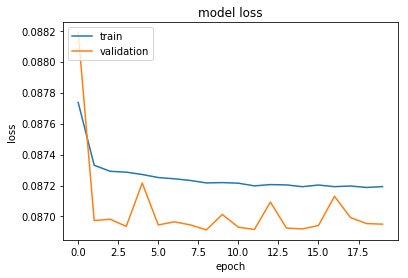

In [68]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [69]:
y_pred= model.predict(X_test)

In [70]:
pred = scaler_y.inverse_transform(y_pred) 

In [71]:
real = scaler_y.inverse_transform(y_test)

In [72]:
error = sqrt(mean_squared_error(pred,real))

print('RMSE value is:', error)

RMSE value is: 76430.93908489437


In [38]:
error = sqrt(mean_squared_error(pred,real))

print('RMSE value is:', error)

RMSE value is: 76426.88619962845


In [56]:
error = sqrt(mean_squared_error(pred,real))

print('RMSE value is:', error)

RMSE value is: 76418.94003525804


In [24]:
real2 = []
for valor in real:
    real2.append(valor[0])

In [25]:
pred2 = []
for valor in pred:
    pred2.append(valor[0])

In [26]:
error = sqrt(mean_squared_error(pred2,real2))

print('RMSE value is:', error)

RMSE value is: 66624.13320062519


In [27]:
pd.DataFrame({"pred":pred2,"real":real2})

,pred,real
0,119382.898438,53933.877550
1,119382.898438,156688.812692
2,104541.953125,50097.187391
3,59367.253906,2572.345044
4,61204.203125,80772.848565
5,102482.593750,93370.124332
6,119382.898438,149232.166599
7,119382.898438,244090.349802
8,91305.718750,15812.252519
9,119382.898438,99356.838754


----

### Auctions

In [3]:
train = pd.read_pickle("../../../modelo/armado_datos/train_completo_auctions.pkl")

In [4]:
(train["target"].max().sum())/ len(train)

0.20154878421450015

In [5]:
len(train)

1286041

In [6]:
train.fillna(0,inplace = True)

In [7]:
maximo = train["target"].max()

In [8]:
maximos = train[train["target"] == maximo]

In [9]:
train = train[train["target"] != maximo]

In [10]:
train = train.append(maximos.sample(150000,random_state = 0))

In [ ]:
del maximos

In [ ]:
X, y = train.drop("target",axis = 1), train["target"]



In [ ]:
X.shape

(1073544, 103)

In [ ]:
y= y.values.reshape(-1,1)


In [ ]:
scaler_x = MinMaxScaler()


In [ ]:
scaler_y = MinMaxScaler()
print(scaler_x.fit(X))
xscale=scaler_x.transform(X)


MinMaxScaler(copy=True, feature_range=(0, 1))


In [ ]:
print(scaler_y.fit(y))
yscale=scaler_y.transform(y)

MinMaxScaler(copy=True, feature_range=(0, 1))


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(xscale, yscale, test_size=0.2, random_state=0)

In [ ]:
def rmse(y_true, y_pred):
    return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))

def build_regressor():
    regressor = Sequential()
    regressor.add(Dense(units=13, input_dim=104))
    regressor.add(Dense(units=1))
    regressor.compile(loss='mse', optimizer='adam', metrics=[rmse])
    return regressor

In [ ]:
model = Sequential()
model.add(Dense(50, input_dim=103, kernel_initializer='normal', activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

W0624 21:29:41.713503 140308775319360 deprecation_wrapper.py:119] From /home/pelozo/anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0624 21:29:42.096714 140308775319360 deprecation_wrapper.py:119] From /home/pelozo/anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0624 21:29:42.183354 140308775319360 deprecation_wrapper.py:119] From /home/pelozo/anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4115: The name tf.random_normal is deprecated. Please use tf.random.normal instead.

W0624 21:29:42.216489 140308775319360 deprecation_wrapper.py:119] From /home/pelozo/anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                5200      
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 408       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 5,617
Trainable params: 5,617
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='mse', optimizer='SDG', metrics=['mse',rmse])

W0624 21:29:42.256882 140308775319360 deprecation_wrapper.py:119] From /home/pelozo/anaconda3/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=50,  verbose=1, validation_data=(X_test,y_test))

W0624 21:29:42.909635 140308775319360 deprecation_wrapper.py:119] From /home/pelozo/anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 858835 samples, validate on 214709 samples
Epoch 1/100
858835/858835 [==============================] - 20s 23us/step - loss: 0.1005 - mean_squared_error: 0.1005 - rmse: 0.2580 - val_loss: 0.0994 - val_mean_squared_error: 0.0994 - val_rmse: 0.2599
Epoch 2/100
858835/858835 [==============================] - 18s 21us/step - loss: 0.0993 - mean_squared_error: 0.0993 - rmse: 0.2563 - val_loss: 0.0989 - val_mean_squared_error: 0.0989 - val_rmse: 0.2567
Epoch 3/100
858835/858835 [==============================] - 18s 20us/step - loss: 0.0990 - mean_squared_error: 0.0990 - rmse: 0.2556 - val_loss: 0.0985 - val_mean_squared_error: 0.0985 - val_rmse: 0.2538
Epoch 4/100
858835/858835 [==============================] - 18s 21us/step - loss: 0.0987 - mean_squared_error: 0.0987 - rmse: 0.2552 - val_loss: 0.0990 - val_mean_squared_error: 0.0990 - val_rmse: 0.2508
Epoch 5/100
858835/858835 [==============================] - 18s 21us/step - loss: 0.0986 - mean_squared_error: 0.0986 - rmse: 0

In [ ]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [28]:
y_pred= model.predict(X_test)

In [29]:
pred = scaler_y.inverse_transform(y_pred) 

In [30]:
real = scaler_y.inverse_transform(y_test)

In [31]:
error = sqrt(mean_squared_error(pred,real))

print('RMSE value is:', error)

RMSE value is: 81211.81519164734


In [33]:
model.save("keras_auctions_reducido.h5")

### Prediccion competencia

In [35]:
features_competencia = pd.read_pickle("../../../analisis/solo_competencia/armado_features/features_completos_competencia.pkl")

In [38]:
features_competencia.fillna(0,inplace = True)

In [41]:
features_competencia.shape

(4037, 102)

In [55]:
col = features_competencia.iloc[1,:24].index

In [42]:
scaler_x_comp = MinMaxScaler()


In [44]:
features_comp =scaler_x_comp.fit_transform(features_competencia)


In [76]:
real2 = []
for valor in real:
    real2.append(valor[0])

In [78]:
pred2 = []
for valor in pred:
    pred2.append(valor[0])

In [82]:
error = sqrt(mean_squared_error(pred2,real2))

print('RMSE value is:', error)

RMSE value is: 46782.89622217884


In [80]:
pd.DataFrame({"pred":pred2,"real":real2})

,pred,real
0,254071.625000,259200.000
1,250365.828125,259200.000
2,250677.875000,259200.000
3,254244.421875,259200.000
4,130438.468750,6885.802
5,253830.453125,259200.000
6,253495.984375,259200.000
7,251706.750000,259200.000
8,126759.046875,58330.013
9,253883.453125,259200.000
